In [17]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Part (a)
activities = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

for activity in activities:
    path = f'./{activity}/'
    files = sorted([f for f in os.listdir(path) if f.endswith('.csv')])
    print(f'{activity}: {len(files)} files')


bending1: 7 files
bending2: 6 files
cycling: 15 files
lying: 15 files
sitting: 15 files
standing: 15 files
walking: 15 files


In [3]:
# Part (b)
train_files = []
test_files = []

for activity in activities:
    path = f'./{activity}/'
    files = sorted([f for f in os.listdir(path) if f.endswith('.csv')])
    
    for f in files:
        dataset_num = int(f.replace('dataset', '').replace('.csv', ''))
        full_path = os.path.join(path, f)

        if activity in ['bending1', 'bending2']:
            if dataset_num <= 2:
                test_files.append((activity, full_path))
            else:
                train_files.append((activity, full_path))
        else:
            if dataset_num <= 3:
                test_files.append((activity, full_path))
            else:
                train_files.append((activity, full_path))

print(f"Train files: {len(train_files)}")
print(f"Test files: {len(test_files)}")

Train files: 69
Test files: 19


In [4]:
# Part (c-ii)
def extract_features_from_file(file_path):
    df = pd.read_csv(file_path, skiprows=4, usecols=range(1, 7))

    features = []
    for col in df.columns:
        series = df[col].dropna() 
        features.append(series.min())
        features.append(series.max())
        features.append(series.mean())
        features.append(series.median())
        features.append(series.std())
        features.append(series.quantile(0.25))
        features.append(series.quantile(0.75))

    return np.array(features)


In [5]:
X_train = []
y_train = []
X_test = []
y_test = []

activity_map = {
    'bending1': 0,
    'bending2': 0,
    'cycling': 1,
    'lying': 2,
    'sitting': 3,
    'standing': 4,
    'walking': 5
}

for activity, filepath in train_files:
    features = extract_features_from_file(filepath)
    X_train.append(features)
    y_train.append(activity_map[activity])

for activity, filepath in test_files:
    features = extract_features_from_file(filepath)
    X_test.append(features)
    y_test.append(activity_map[activity])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (69, 42)
y_train shape: (69,)
X_test shape: (19, 42)
y_test shape: (19,)


In [6]:
columns = []
for i in range(1, 7):
    for stat in ["min", "max", "mean", "median", "std", "q1", "q3"]:
        columns.append(f"{stat}_{i}")

train_data = pd.DataFrame(X_train, columns=columns)
train_data["label"] = y_train  # optional

test_data = pd.DataFrame(X_test, columns=columns)
test_data["label"] = y_test  # optional

new_dataset=pd.concat([train_data,test_data])


In [7]:
new_dataset

,min_1,max_1,mean_1,median_1,std_1,q1_1,q3_1,min_2,max_2,mean_2,...,q1_5,q3_5,min_6,max_6,mean_6,median_6,std_6,q1_6,q3_6,label
0,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.500,0.0,1.79,0.493292,0.430,0.513506,0.000,0.940,0
1,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.330,0.0,2.18,0.613521,0.500,0.524317,0.000,1.000,0
2,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.250,0.0,1.79,0.383292,0.430,0.389164,0.000,0.500,0
3,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.000,0.0,5.26,0.679646,0.500,0.622534,0.430,0.870,0
4,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.750,0.0,2.96,0.555312,0.490,0.487826,0.000,0.830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,35.50,46.25,43.174938,43.670,1.989052,42.50,44.5000,0.0,2.12,0.506583,...,12.7500,16.500,0.0,5.72,0.911979,0.830,0.666161,0.470,1.220,4
15,32.75,47.00,42.760562,44.500,3.398919,41.33,45.3725,0.0,3.34,0.486167,...,13.0000,18.565,0.0,5.73,0.842271,0.710,0.722165,0.430,1.090,4
16,19.33,43.50,34.227771,35.500,4.889576,30.50,37.7500,0.0,14.50,3.995729,...,14.7500,18.670,0.0,9.74,3.394125,3.100,1.792090,2.105,4.425,5
17,12.50,45.00,33.509729,34.125,4.850923,30.50,36.7500,0.0,13.05,4.450771,...,14.6275,18.750,0.0,8.96,3.378479,3.085,1.787360,2.060,4.440,5


In [8]:
# Part (c-iii)
def bootstrap_std_ci(data, n_bootstrap=1000, ci=0.90):
    std_samples = []
    for _ in range(n_bootstrap):
        resample = np.random.choice(data, size=len(data), replace=True)
        std = np.std(resample)
        std_samples.append(std)

    lower = np.percentile(std_samples, (1 - ci) / 2 * 100)
    upper = np.percentile(std_samples, (1 + ci) / 2 * 100)
    return lower, upper


In [9]:
new_dataset_clean = new_dataset.dropna()

print("Original shape:", new_dataset.shape)
print("Cleaned shape:", new_dataset_clean.shape)


Original shape: (88, 43)
Cleaned shape: (87, 43)


In [10]:
for col in new_dataset_clean.columns[:-1]:
    lower, upper = bootstrap_std_ci(new_dataset_clean[col])
    print(f"{col}: CI for std = [{lower:.3f}, {upper:.3f}]")

min_1: CI for std = [8.267, 10.757]
max_1: CI for std = [3.154, 5.044]
mean_1: CI for std = [4.632, 5.785]
median_1: CI for std = [4.669, 5.923]
std_1: CI for std = [1.553, 1.953]
q1_1: CI for std = [5.486, 6.604]
q3_1: CI for std = [4.186, 5.761]
min_2: CI for std = [0.000, 0.000]
max_2: CI for std = [4.618, 5.354]
mean_2: CI for std = [1.395, 1.692]
median_2: CI for std = [1.233, 1.535]
std_2: CI for std = [0.806, 0.936]
q1_2: CI for std = [0.835, 1.037]
q3_2: CI for std = [1.880, 2.282]
min_3: CI for std = [2.737, 3.095]
max_3: CI for std = [4.173, 5.419]
mean_3: CI for std = [3.345, 4.448]
median_3: CI for std = [3.374, 4.510]
std_3: CI for std = [0.771, 1.135]
q1_3: CI for std = [3.573, 4.661]
q3_3: CI for std = [3.435, 4.680]
min_4: CI for std = [0.000, 0.000]
max_4: CI for std = [1.972, 2.348]
mean_4: CI for std = [1.074, 1.216]
median_4: CI for std = [1.053, 1.197]
std_4: CI for std = [0.418, 0.482]
q1_4: CI for std = [0.770, 0.887]
q3_4: CI for std = [1.432, 1.622]
min_5: CI f

In [11]:
X = new_dataset_clean.iloc[:, :-1]
y = new_dataset_clean["label"] 

In [12]:
print(sm.OLS(y,X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  label   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              35.67
Date:                Thu, 03 Apr 2025   Prob (F-statistic):                    2.28e-24
Time:                        20:55:39   Log-Likelihood:                         -71.424
No. Observations:                  87   AIC:                                      222.8
Df Residuals:                      47   BIC:                                      321.5
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
# Part (c-iv)

# The selection of features should be based on the specific classification task. 
# Since we are dealing with a binary classification problem (distinguishing between bending and non-bending activities), 
# it's helpful to choose features that make this separation as clear as possible.
# To do this, I focus on the distribution of feature values across the two classes. 
# Ideally, we want features where the distributions of the two classes have minimal overlap, 
# which allows for a more distinct and easier decision boundary. 
# Additionally, features where one class shows a more concentrated (less spread-out) distribution can provide more consistent signals for classification.
# Based on this idea of visually separable and well-defined distributions, 
# I selected maximum, mean, and third quartile (75%) values as the top three features. 
# These features showed the clearest differences between the bending and non-bending classes and are therefore strong candidates for classification.

In [14]:
# Part (c-v)
bending_binary_train = new_dataset_clean.copy()
bending_binary_train['label'] = bending_binary_train['label'].apply(lambda x: 0 if x == 0 else 1)


In [15]:
def pairplot(data, series_nums, select_features):
    selected_features = [f"{stat}_{i}" for i in series_nums for stat in select_features]
    selected_data = data[selected_features + ['label']]
    sns.pairplot(selected_data, hue='label', plot_kws={'alpha': 0.8})
    plt.show()


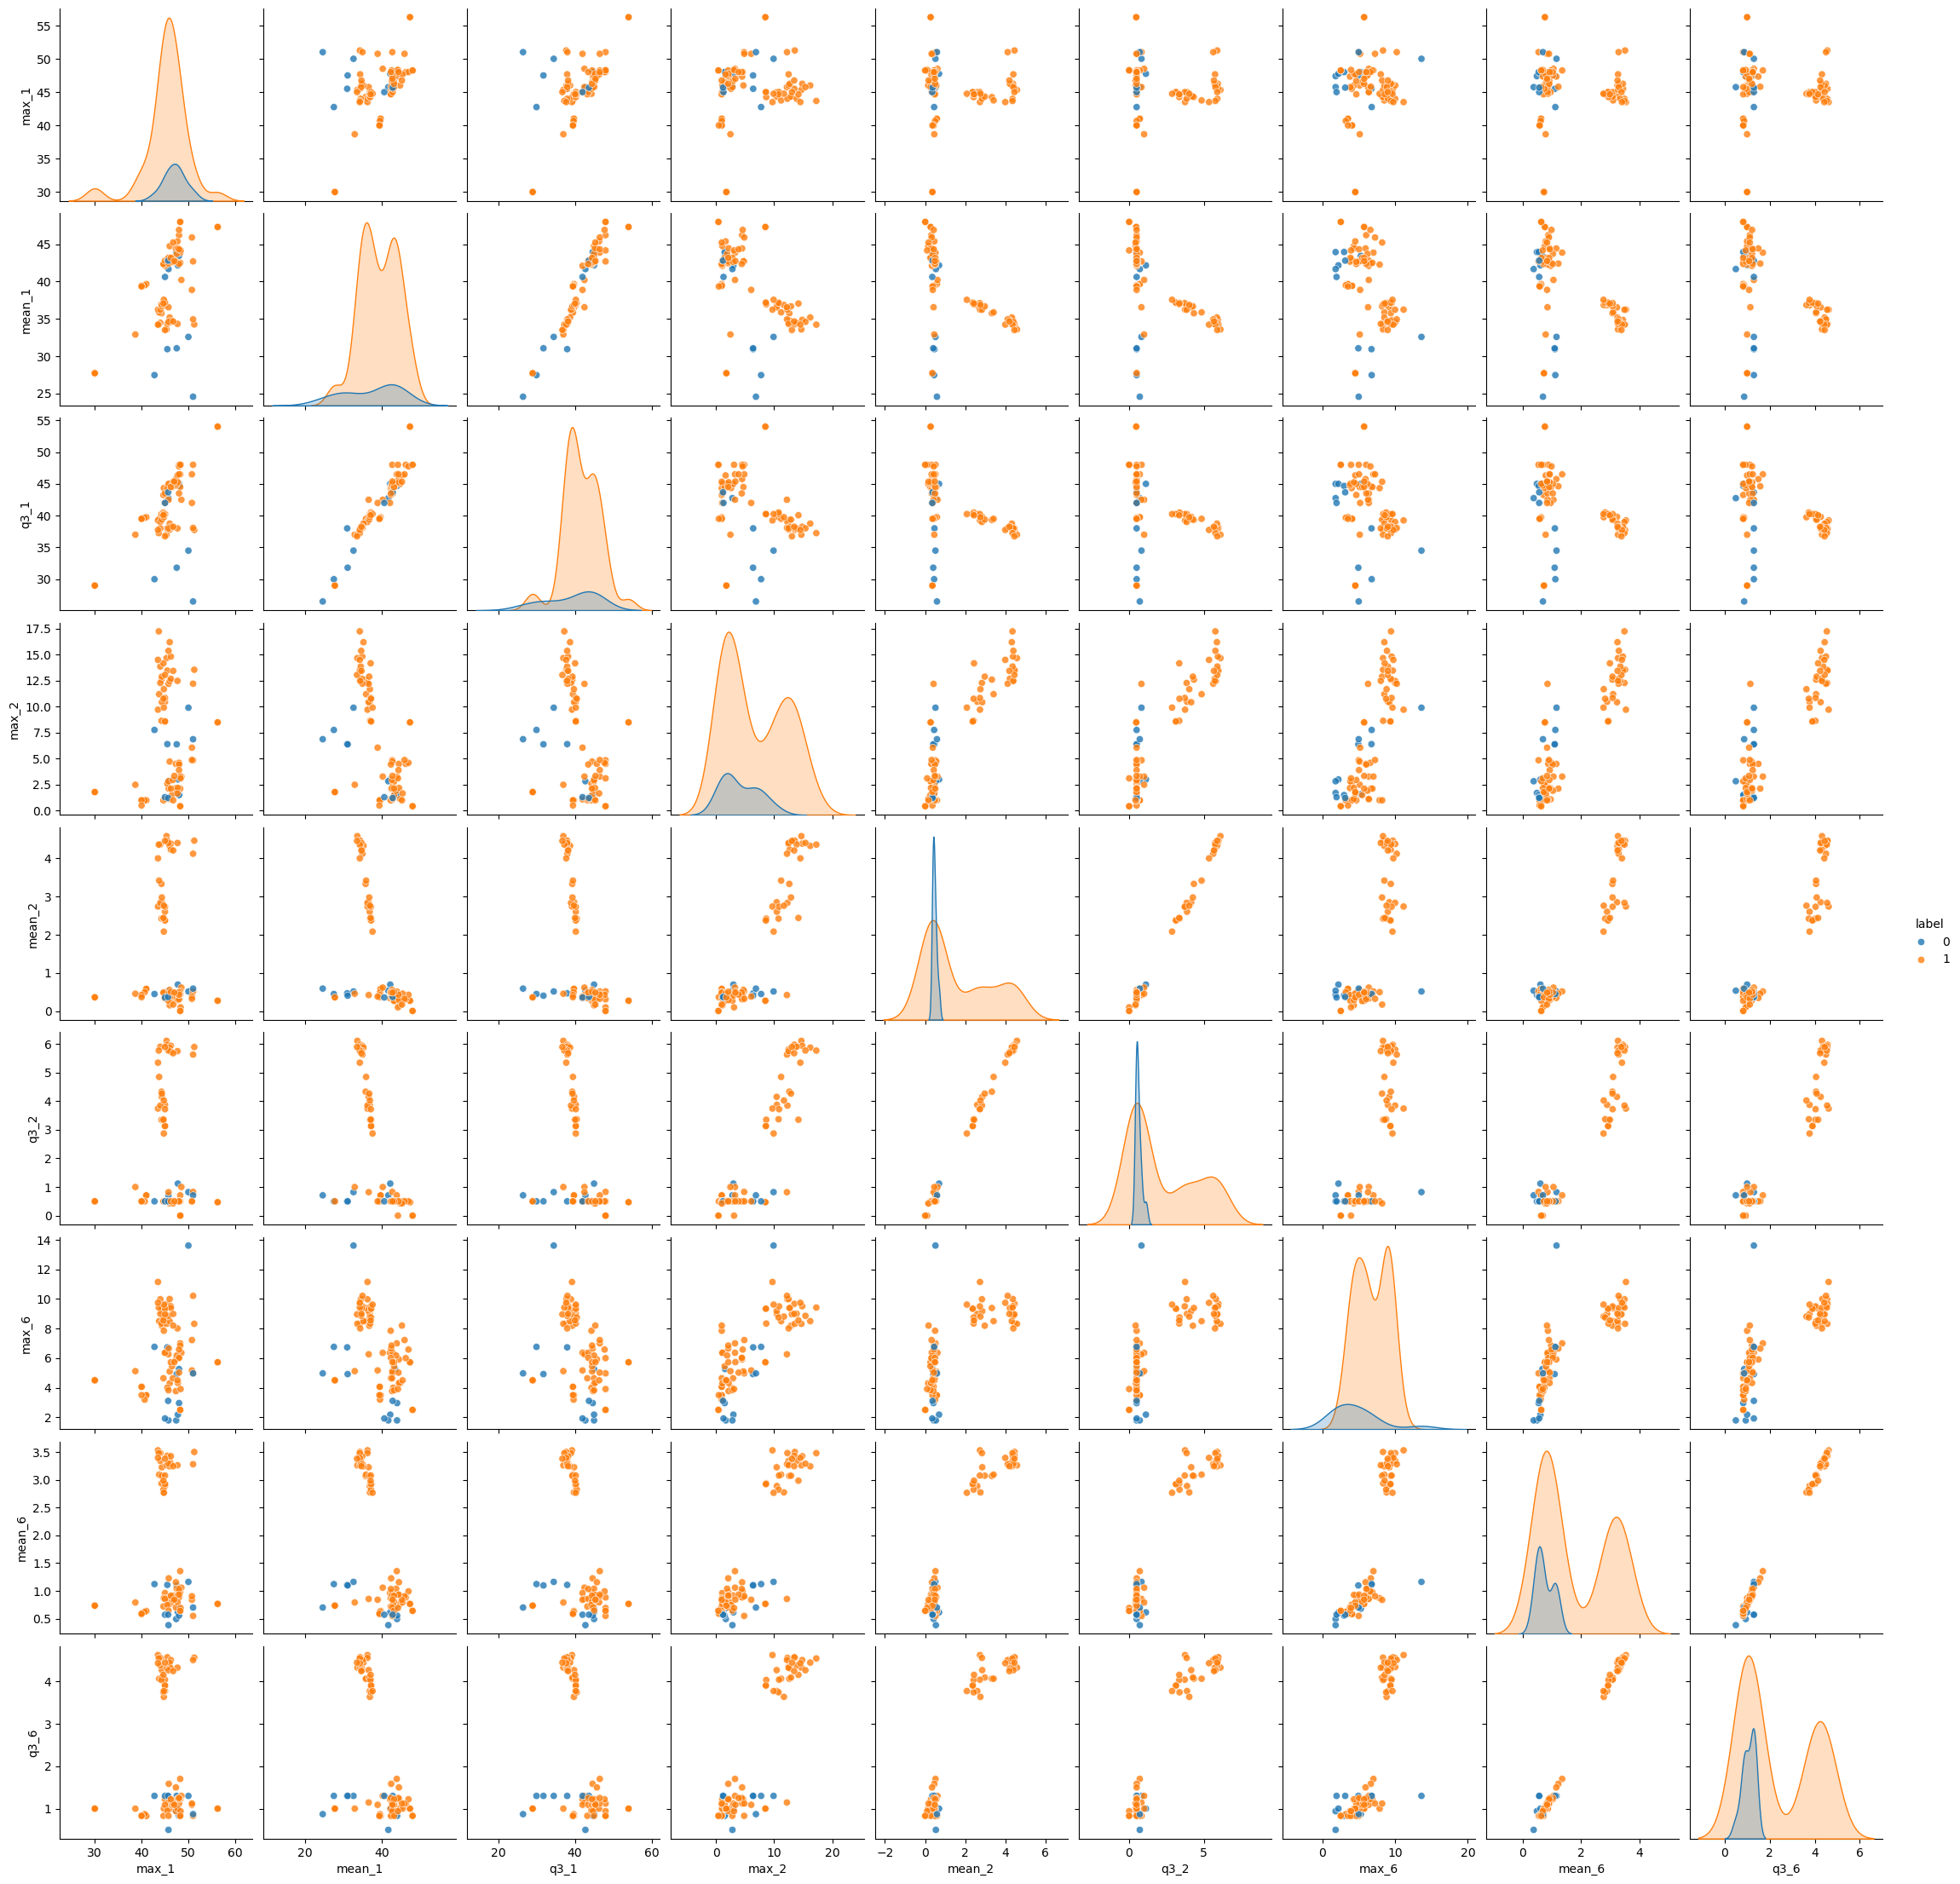

In [18]:
pairplot(
    bending_binary_train,
    series_nums=[1, 2, 6],
    select_features=['max', 'mean', 'q3']
)
